# Comparing QAOA warm-start methods

In [1]:
import sys
sys.path.insert(0, './../')
from quantum_solvers import *
from helper_functions import *
from save_results import *
from qiskit.providers.aer import AerSimulator
from seaborn import *
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8')
backend = AerSimulator(method='statevector', device='GPU', precision='single')

## Single graph example

In [2]:
n_qubits = 20
n_layers = 2
shots = 512

graph = random_graph(n_qubits)
exact_obj = akmaxsat(graph)[1]
print('True max-cut obj:', exact_obj)

standard_qaoa = QAOASolver(n_layers=n_layers, warm_start_method=None, epsilon=None, backend=backend, shots=shots)
standard_res = standard_qaoa.solve(graph)
print('\nStandard QAOA\n', standard_res)

gw_rounded_qaoa = QAOASolver(n_layers=n_layers, warm_start_method='GW Rounded', epsilon=.25, backend=backend, shots=shots)
gw_rounded_res = gw_rounded_qaoa.solve(graph)
print('\nGW-WS-QAOA\n', gw_rounded_res)

bmz_relaxed = BMZ(graph)

bmz_rounded_qaoa = QAOASolver(n_layers=n_layers, warm_start_method='BMZ Rounded', epsilon=.25, backend=backend, shots=shots)
bmz_rounded_res = bmz_rounded_qaoa.solve(graph, relaxed_solution=bmz_relaxed)
print('\nBMZ-Rounded-WS-QAOA\n', bmz_rounded_res)

bmz_qaoa = QAOASolver(n_layers=n_layers, warm_start_method='BMZ', epsilon=.2, backend=backend, shots=shots)
bmz_res = bmz_qaoa.solve(graph, relaxed_solution=bmz_relaxed)
print('\nBMZ-WS-QAOA\n', bmz_res)

True max-cut obj: -565.2371828373429

Standard QAOA
      bitstring: 10110011101100010000
           obj: -523.775761324913
   expectation: -455.7246224506252
unique_samples: 512

GW-WS-QAOA
      bitstring: 00011100110011000111
           obj: -550.5754728788689
   relaxed_obj: -546.4158039299352
   expectation: -478.1845474743093
unique_samples: 468

BMZ-Rounded-WS-QAOA
      bitstring: 01001000010111000111
           obj: -565.2371828373429
   relaxed_obj: -565.2371828373426
   expectation: -493.94934491971765
unique_samples: 498

BMZ-WS-QAOA
      bitstring: 10110111101000111000
           obj: -565.2371828373429
   relaxed_obj: -565.2371828373426
   expectation: -522.4233362555476
unique_samples: 324


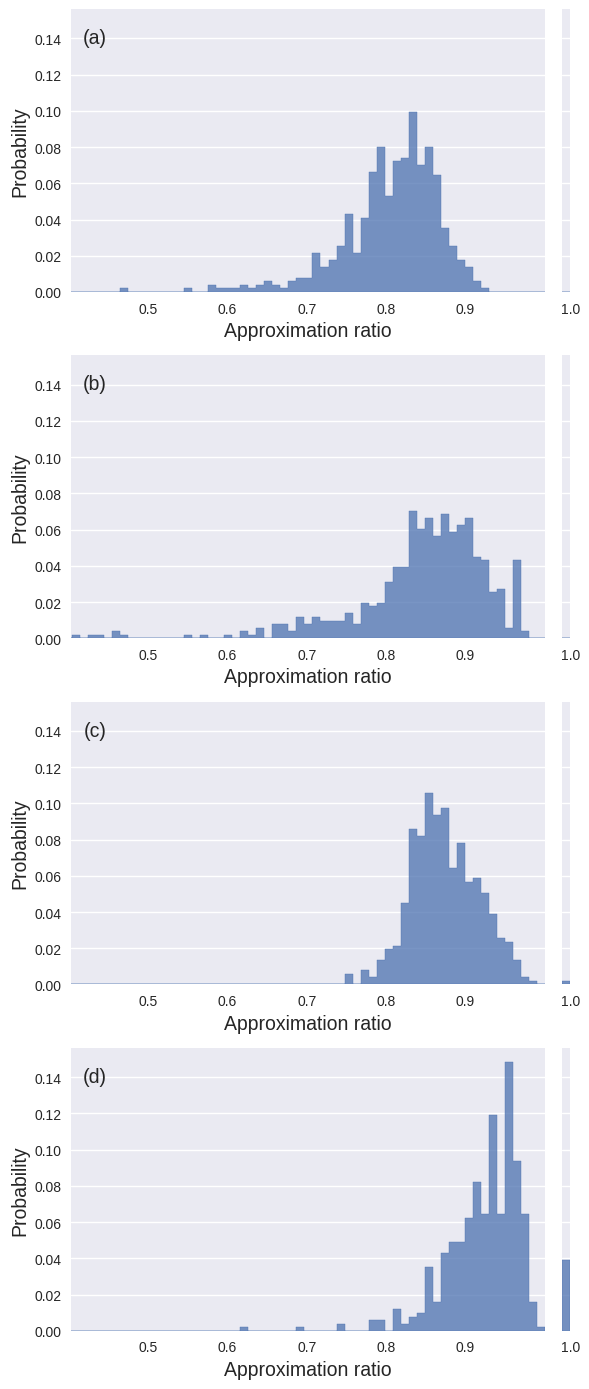

In [4]:
standard_bars = get_ratio_counts(standard_res.counts, graph)
gw_rounded_bars = get_ratio_counts(gw_rounded_res.counts, graph)
bmz_rounded_bars = get_ratio_counts(bmz_rounded_res.counts, graph)
bmz_bars = get_ratio_counts(bmz_res.counts, graph)

n_bins = 100
width = 1/n_bins

ymax = 0
xmin = 1
for dictionary in [standard_bars, gw_rounded_bars, bmz_rounded_bars, bmz_bars]:
    temp_max = max([dictionary[key] for key in dictionary.keys()])/shots
    sorted = np.sort([key for key in dictionary.keys()])
    counter = 0 
    temp_min = 0
    while temp_min == 0:
        temp_min = sorted[counter]
        counter += 1
    if temp_max > ymax:
        ymax = temp_max
    if temp_min < xmin:
        xmin = temp_min
ymax = min([1, 4*ymax])
xmin -= width

width_ratio = width/(1 - xmin)
fig, axes = plt.subplots(4, 2, figsize=(6, 14), width_ratios=[1 - width_ratio, width_ratio], sharey=True)
axes = axes.ravel()
blue = color_palette('deep')[0]

standard_dense = []
standard_perfect = []
for key in standard_bars.keys():
    if key == 1:
        standard_perfect += [key]*standard_bars[key]
        standard_dense += [0]*standard_bars[key]
    else:
        standard_dense += [key]*standard_bars[key]
        standard_perfect += [0]*standard_bars[key]
histplot(standard_dense, ax=axes[0], stat='probability', bins=np.linspace(0, 1, n_bins), element='step')
axes[0].set_title('(a)', fontsize=14, x=.05, y=.85)
axes[0].set_xlabel('Approximation ratio', fontsize=14)
axes[0].set_ylabel('Probability', fontsize=14)
axes[0].set_xlim(xmin, .9999)
axes[0].set_ylim(0, ymax)
axes[0].grid(False, axis='x')

histplot(standard_perfect, ax=axes[1], stat='probability', bins=np.linspace(0, 1, n_bins), element='step')
axes[1].set_xticks([1.0], ['1.0'])
axes[1].grid(False, axis='x')
axes[1].set_xlim(1 - width, 1)

gw_rounded_dense = []
gw_rounded_perfect = []
for key in gw_rounded_bars.keys():
    if key == 1:
        gw_rounded_perfect += [key]*gw_rounded_bars[key]
        gw_rounded_dense += [0]*gw_rounded_bars[key]
    else:
        gw_rounded_dense += [key]*gw_rounded_bars[key]
        gw_rounded_perfect += [0]*gw_rounded_bars[key]
histplot(gw_rounded_dense, ax=axes[2], stat='probability', bins=np.linspace(0, 1, n_bins), element='step')
axes[2].set_title('(b)', fontsize=14, x=.05, y=.85)
axes[2].set_xlabel('Approximation ratio', fontsize=14)
axes[2].set_ylabel('Probability', fontsize=14)
axes[2].set_xlim(xmin, .9999)
axes[2].set_ylim(0, ymax)
axes[2].grid(False, axis='x')

histplot(gw_rounded_perfect, ax=axes[3], stat='probability', bins=np.linspace(0, 1, n_bins), element='step')
axes[3].set_xticks([1.0], ['1.0'])
axes[3].grid(False, axis='x')
axes[3].set_xlim(1 - width, 1)

bmz_rounded_dense = []
bmz_rounded_perfect = []
for key in bmz_rounded_bars.keys():
    if key == 1:
        bmz_rounded_perfect += [key]*bmz_rounded_bars[key]
        bmz_rounded_dense += [0]*bmz_rounded_bars[key]
    else:
        bmz_rounded_dense += [key]*bmz_rounded_bars[key]
        bmz_rounded_perfect += [0]*bmz_rounded_bars[key]
histplot(bmz_rounded_dense, ax=axes[4], stat='probability', bins=np.linspace(0, 1, n_bins), element='step')
axes[4].set_title('(c)', fontsize=14, x=.05, y=.85)
axes[4].set_xlabel('Approximation ratio', fontsize=14)
axes[4].set_ylabel('Probability', fontsize=14)
axes[4].set_xlim(xmin, .9999)
axes[4].set_ylim(0, ymax)
axes[4].grid(False, axis='x')

histplot(bmz_rounded_perfect, ax=axes[5], stat='probability', bins=np.linspace(0, 1, n_bins), element='step')
axes[5].set_xticks([1.0], ['1.0'])
axes[5].grid(False, axis='x')
axes[5].set_xlim(1 - width, 1)

bmz_dense = []
bmz_perfect = []
for key in bmz_bars.keys():
    if key == 1:
        bmz_perfect += [key]*bmz_bars[key]
        bmz_dense += [0]*bmz_bars[key]
    else:
        bmz_dense += [key]*bmz_bars[key]
        bmz_perfect += [0]*bmz_bars[key]
histplot(bmz_dense, ax=axes[6], stat='probability', bins=np.linspace(0, 1, n_bins), element='step')
axes[6].set_title('(d)', fontsize=14, x=.05, y=.85)
axes[6].set_xlabel('Approximation ratio', fontsize=14)
axes[6].set_ylabel('Probability', fontsize=14)
axes[6].set_xlim(xmin, .9999)
axes[6].set_ylim(0, ymax)
axes[6].grid(False, axis='x')

histplot(bmz_perfect, ax=axes[7], stat='probability', bins=np.linspace(0, 1, n_bins), element='step')
axes[7].set_xticks([1.0], ['1.0'])
axes[7].grid(False, axis='x')
axes[7].set_xlim(1 - width, 1)

plt.tight_layout()
save_plot('single_run')
plt.show()